Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.5729 - loss: 0.7041 - val_accuracy: 0.8090 - val_loss: 0.4944
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.6999 - loss: 0.5629 - val_accuracy: 0.8300 - val_loss: 0.4217
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.7726 - loss: 0.4817 - val_accuracy: 0.8280 - val_loss: 0.3885
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.7806 - loss: 0.4596 - val_accuracy: 0.8470 - val_loss: 0.3512
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.8122 - loss: 0.4338 - val_accuracy: 0.8610 - val_loss: 0.3313
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8047 - loss: 0.4178 - val_accuracy: 0.8620 - val_loss: 0.3181
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.8153 - loss: 0.3823 - val_accuracy: 0.8690 - val_loss: 0.3064
Epoch 8/30
10

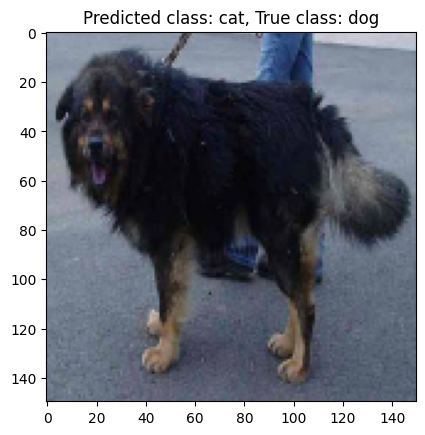

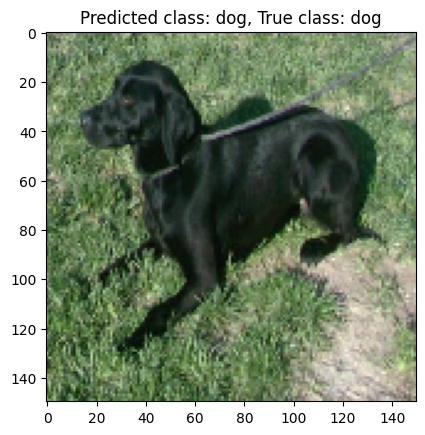

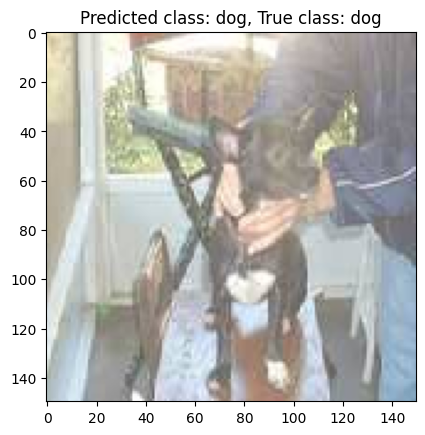

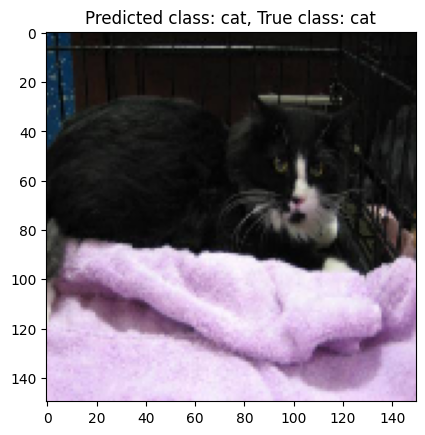

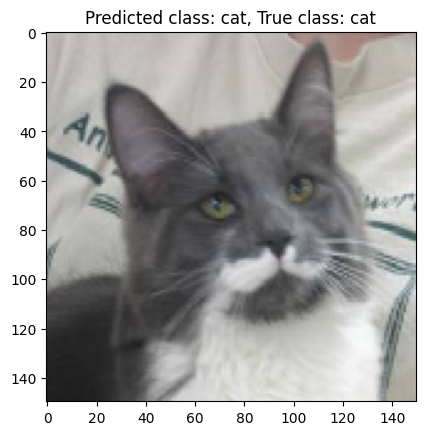

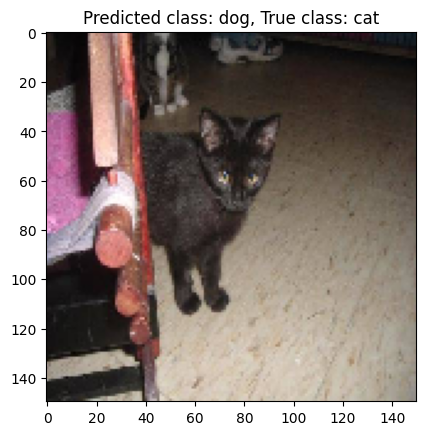

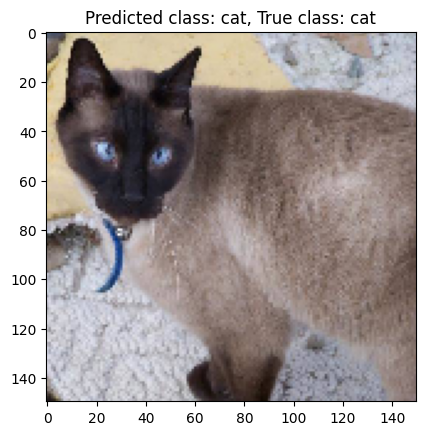

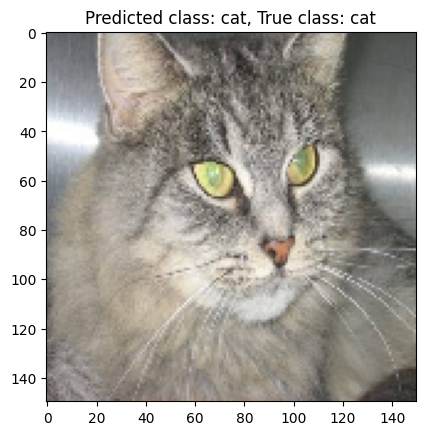

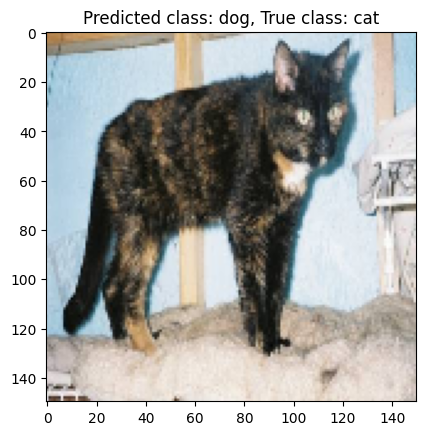

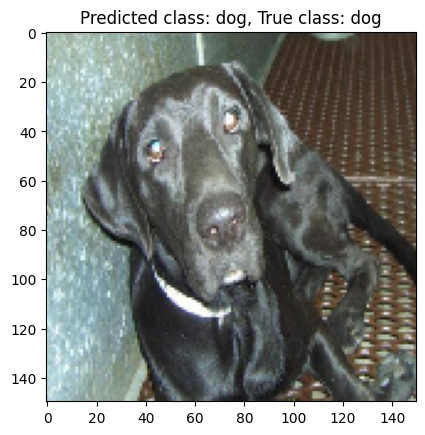

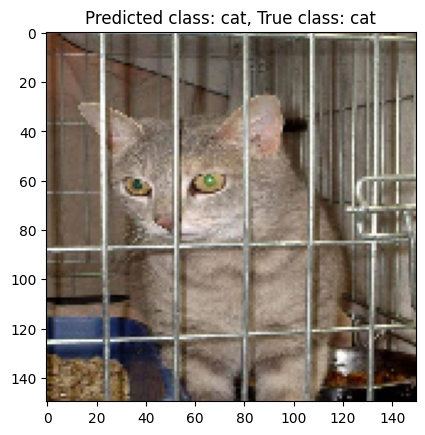

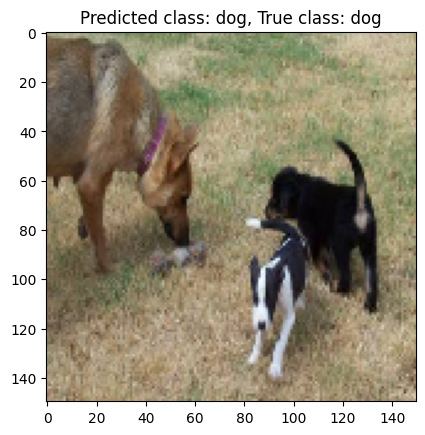

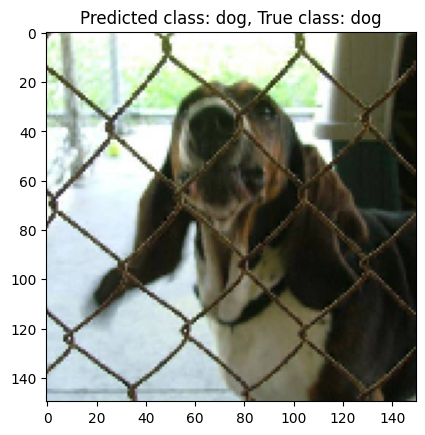

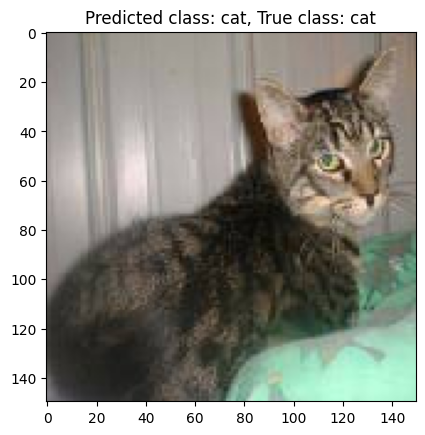

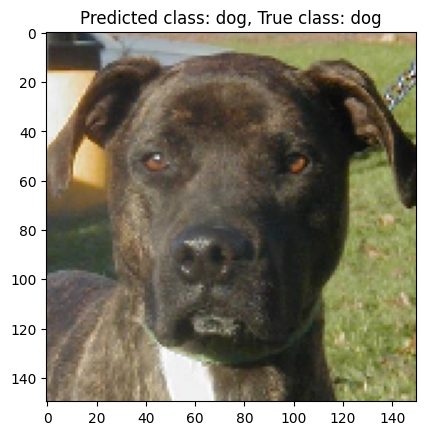

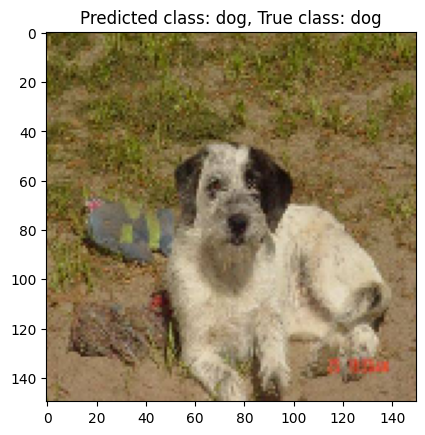

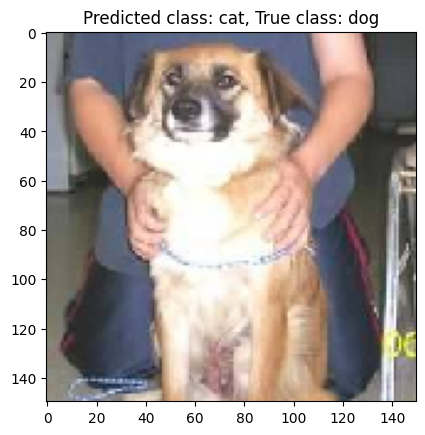

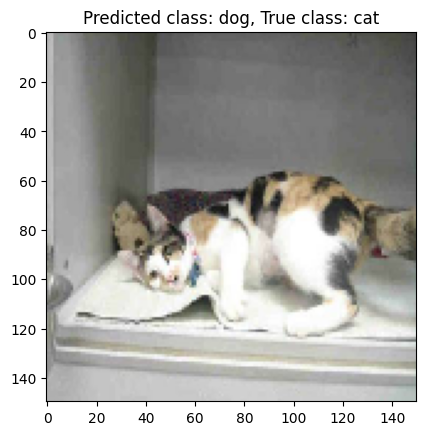

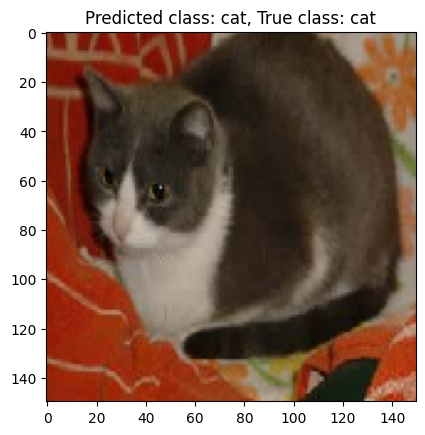

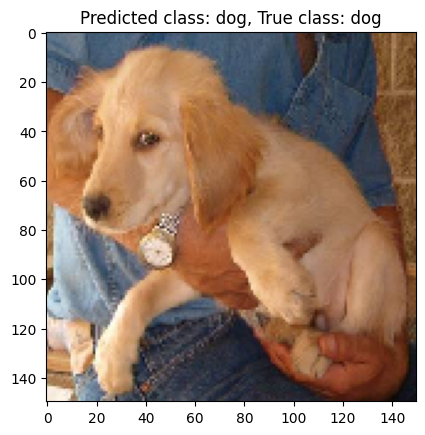

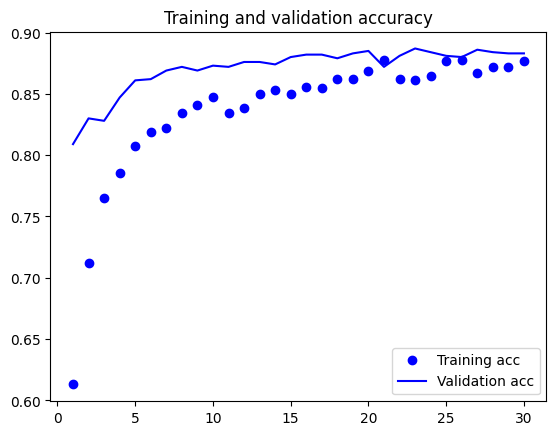

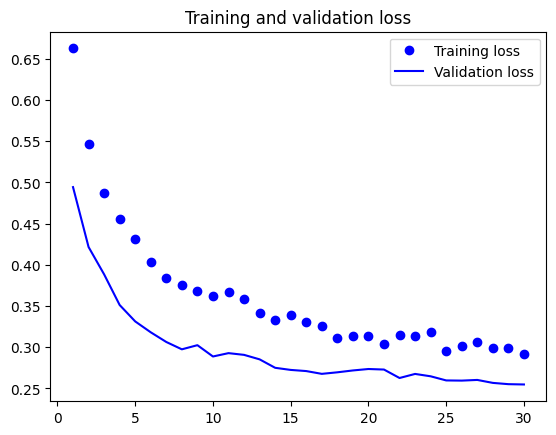

Gayatri kulkarni-53004230002


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

#Download
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
#filename = os.path.join(os.getcwd(), "cats_and_dogs_filtered.zip")
cache_dir = os.getcwd() 
filename = "cats_and_dogs_filtered.zip"
file_path = tf.keras.utils.get_file(fname=filename, origin=url, cache_dir=cache_dir, extract=False)
tf.keras.utils.get_file(filename, url)
#with zipfile.ZipFile("cats_and_dogs_filtered.zip", "r") as zip_ref:
   # zip_ref.extractall()
with zipfile.ZipFile(file_path, "r") as zip_ref:
    zip_ref.extractall()
#define
train_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered", "train")
validation_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered", "validation")

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode="binary")
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode="binary")

#Load 
conv_base = VGG16(weights="imagenet",
                 include_top=False,
                  input_shape=(150, 150, 3))
#freeze
conv_base.trainable = False
#build
model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

#compile
model.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
             metrics=["accuracy"])
#train
history = model.fit(train_generator,
                   steps_per_epoch=100,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=50)
#show
x, y_true = next(validation_generator)
y_pred = model.predict(x)
class_names = ['cat', 'dog']
for i in range(len(x)):
    plt.imshow(x[i])
    plt.title(f'Predicted class: {class_names[int(round(y_pred[i][0]))]}, True class: {class_names[int(y_true[i])]}')
    plt.show()
#plot
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b",label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()
print("Gayatri kulkarni-53004230002")



